Monthly Data:
  YearMonth  Total_Leads  Closed_Leads  Good_Quality_Leads  Bad_Quality_Leads  \
0   2009-04          518            56                  23                 57   
1   2009-05          580            37                  22                 57   
2   2009-06          609            63                  23                141   
3   2009-07          532            33                  16                110   
4   2009-08          438            41                  21                 67   
5   2009-09          344            15                  43                 56   

   Unknown_Leads  Known_Leads  
0            382          136  
1            464          116  
2            382          227  
3            373          159  
4            309          129  
5            230          114  


<Figure size 1400x800 with 0 Axes>

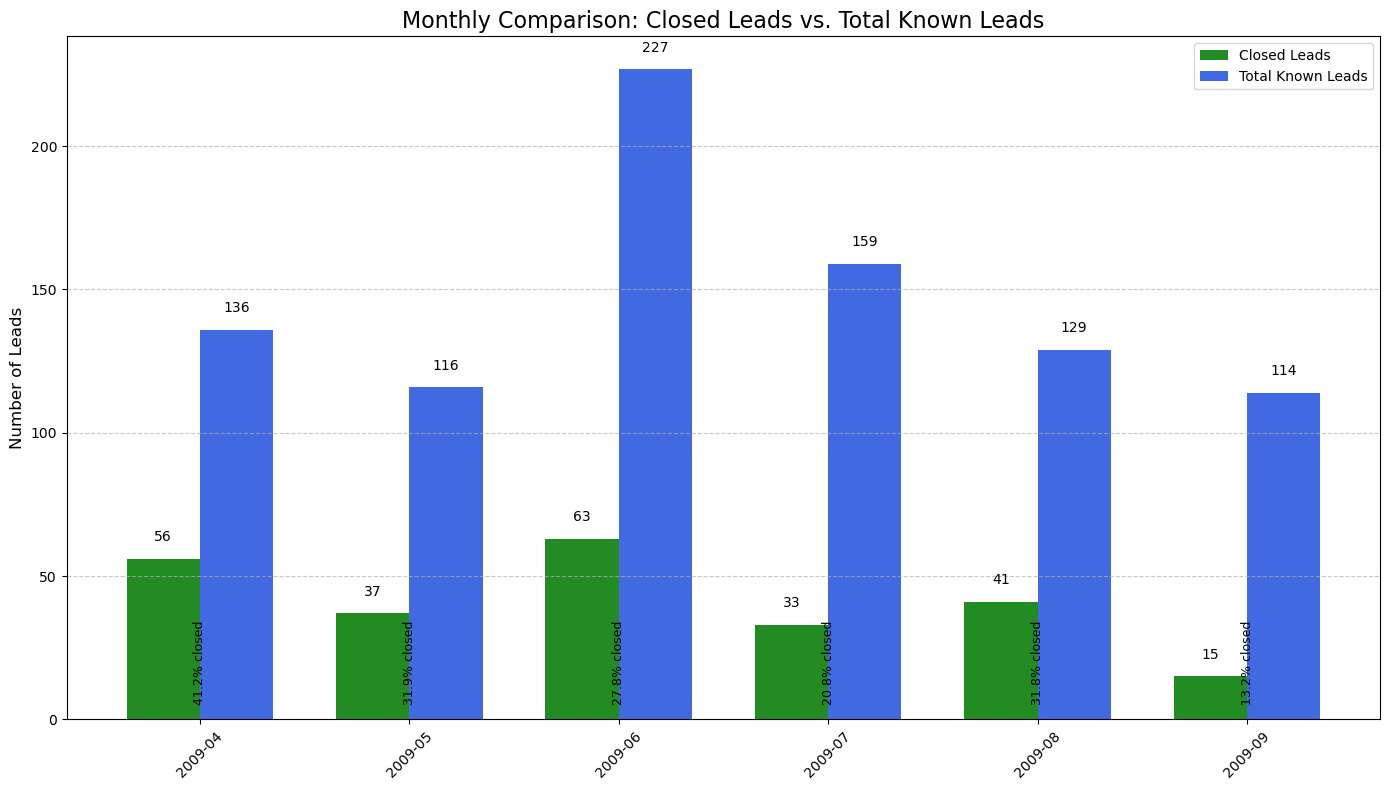

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def create_monthly_side_by_side_comparison(file_path):
    """
    Creates a side-by-side bar graph showing closed leads vs. total known leads by month
    """
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Define a function to categorize CallStatus
    def categorize_call_status(status):
        if pd.isna(status):
            return 'Unknown'
        if status == 'Closed':
            return 'Closed'
        if status in ['EP Sent', 'EP Received', 'EP Confirmed']:
            return 'Good Quality'
        if status in ['Unable to contact - Bad Contact Information', 'Contacted - Invalid Profile', "Contacted - Doesn't Qualify"]:
            return 'Bad Quality'
        return 'Unknown'
    
    # Process dates and create quality categories
    df['LeadDate'] = pd.to_datetime(df['LeadCreated']).dt.date
    df['YearMonth'] = pd.to_datetime(df['LeadCreated']).dt.strftime('%Y-%m')
    df['QualityCategory'] = df['CallStatus'].apply(categorize_call_status)
    
    # Group by month and calculate metrics
    monthly_data = df.groupby('YearMonth').apply(lambda x: pd.Series({
        'Total_Leads': len(x),
        'Closed_Leads': sum(x['QualityCategory'] == 'Closed'),
        'Good_Quality_Leads': sum(x['QualityCategory'] == 'Good Quality'),
        'Bad_Quality_Leads': sum(x['QualityCategory'] == 'Bad Quality'),
        'Unknown_Leads': sum(x['QualityCategory'] == 'Unknown'),
        'Known_Leads': sum(x['QualityCategory'] != 'Unknown')
    })).reset_index()
    
    # Sort by date
    monthly_data = monthly_data.sort_values('YearMonth')
    
    # Print the monthly data for reference
    print("Monthly Data:")
    print(monthly_data)
    
    # Create the side-by-side bar graph
    create_side_by_side_bar_chart(monthly_data)
    
    
    return monthly_data

def create_side_by_side_bar_chart(data):
    """Create a side-by-side bar chart comparing closed vs. known leads"""
    plt.figure(figsize=(14, 8))
    
    # Set up the plot
    x = np.arange(len(data))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create the bars
    bars1 = ax.bar(x - width/2, data['Closed_Leads'], width, label='Closed Leads', color='forestgreen')
    bars2 = ax.bar(x + width/2, data['Known_Leads'], width, label='Total Known Leads', color='royalblue')
    
    # Add data labels
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, f"{int(height)}", 
               ha='center', va='bottom', fontsize=10)
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, f"{int(height)}", 
               ha='center', va='bottom', fontsize=10)
    
    # Add closed rate labels
    for i, row in enumerate(data.itertuples()):
        closed_rate = row.Closed_Leads / row.Known_Leads * 100 if row.Known_Leads > 0 else 0
        ax.text(i, 5, f"{closed_rate:.1f}% closed", ha='center', va='bottom', 
               color='black', fontsize=9, rotation=90)
    
    # Configure the plot
    ax.set_ylabel('Number of Leads', fontsize=12)
    ax.set_title('Monthly Comparison: Closed Leads vs. Total Known Leads', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(data['YearMonth'], rotation=45)
    ax.legend()
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


# Example usage
if __name__ == "__main__":
    file_path = "Aarki.xlsx"
    monthly_data = create_monthly_side_by_side_comparison(file_path)

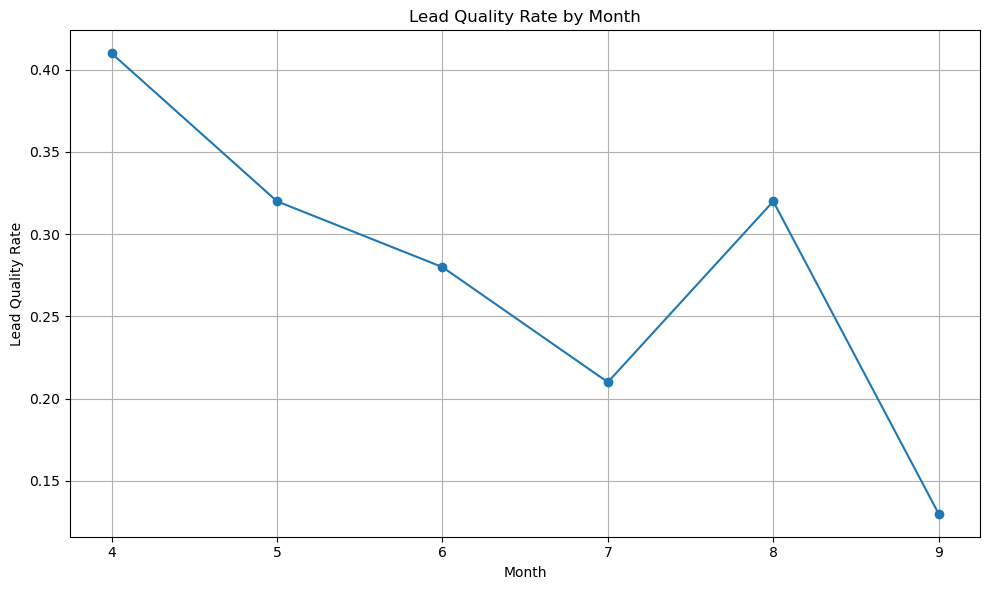

In [50]:
# Re-import libraries and reload the dataset after kernel reset
import pandas as pd
import matplotlib.pyplot as plt

# Reload the Excel file
file_path = "Aarki.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# Extract the month number from LeadCreated
df['Month'] = df['LeadCreated'].dt.month

# Calculate Lead_Quality_Rate per month
lead_quality_rate = (
    df.groupby('Month')
    .apply(lambda g: round(
        g['CallStatus'].eq('Closed').sum() / g['CallStatus'].notnull().sum(), 2))
    .reset_index(name='Lead_Quality_Rate')
)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(lead_quality_rate['Month'], lead_quality_rate['Lead_Quality_Rate'], marker='o')
plt.title('Lead Quality Rate by Month')
plt.xlabel('Month')
plt.ylabel('Lead Quality Rate')
plt.xticks(lead_quality_rate['Month'])
plt.grid(True)
plt.tight_layout()
plt.show()




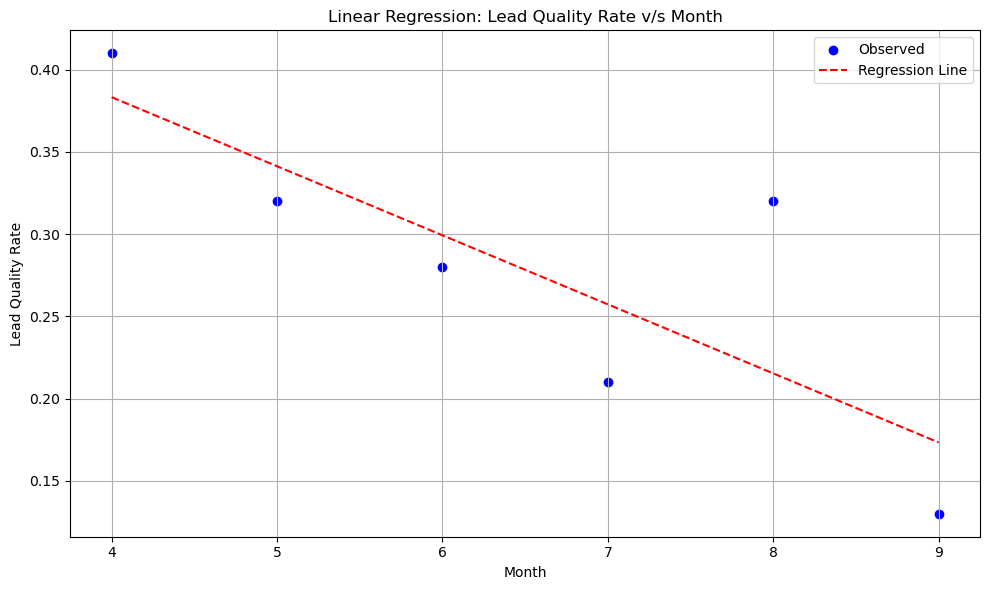

In [51]:
# Plotting the data and regression line
import matplotlib.pyplot as plt
import numpy as np

# Generate prediction line
lead_quality['Predicted'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(lead_quality['Month'], lead_quality['Lead_Quality_Rate'], color='blue', label='Observed')
plt.plot(lead_quality['Month'], lead_quality['Predicted'], color='red', linestyle='--', label='Regression Line')
plt.title('Linear Regression: Lead Quality Rate v/s Month')
plt.xlabel('Month')
plt.ylabel('Lead Quality Rate')
plt.xticks(np.arange(4, 10, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import numpy as np
from scipy import stats

# Define a function to categorize CallStatus
def categorize_call_status(status):
    if pd.isna(status):
        return 'Unknown'
    if status == 'Closed':
        return 'Closed'
    if status in ['EP Sent', 'EP Received', 'EP Confirmed']:
        return 'Good Quality'
    if status in ['Unable to contact - Bad Contact Information', 'Contacted - Invalid Profile', "Contacted - Doesn't Qualify"]:
        return 'Bad Quality'
    return 'Unknown'

def perform_statistical_trend_analysis(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Process dates and create quality categories
    df['LeadDate'] = pd.to_datetime(df['LeadCreated']).dt.date
    df['YearMonth'] = pd.to_datetime(df['LeadCreated']).dt.strftime('%Y-%m')
    df['QualityCategory'] = df['CallStatus'].apply(categorize_call_status)
    
    # Filter out Unknown category for the main analysis
    df_known = df[df['QualityCategory'] != 'Unknown']
    
    # Group by month and calculate quality metrics
    monthly_data = df_known.groupby('YearMonth').apply(lambda x: pd.Series({
        'total': len(x),
        'closed': sum(x['QualityCategory'] == 'Closed'),
        'good_quality': sum(x['QualityCategory'] == 'Good Quality'),
        'bad_quality': sum(x['QualityCategory'] == 'Bad Quality')
    })).reset_index()
    
    # Calculate rates
    monthly_data['closed_rate'] = monthly_data['closed'] / monthly_data['total']
    monthly_data['good_quality_rate'] = monthly_data['good_quality'] / monthly_data['total']
    monthly_data['bad_quality_rate'] = monthly_data['bad_quality'] / monthly_data['total']
    monthly_data['combined_success_rate'] = (monthly_data['closed'] + monthly_data['good_quality']) / monthly_data['total']
    
    # Sort by date
    monthly_data = monthly_data.sort_values('YearMonth')
    
    # Prepare data for regression analysis
    months = range(len(monthly_data))
    
    # Perform linear regression and statistical tests for each metric
    metrics = {
        'Closed Rate': monthly_data['closed_rate'],
        'Good Quality Rate': monthly_data['good_quality_rate'],
        'Bad Quality Rate': monthly_data['bad_quality_rate'],
        'Combined Success Rate': monthly_data['combined_success_rate']
    }
    
    print("\nStatistical Trend Analysis (Excluding Unknown):")
    for metric_name, metric_values in metrics.items():
        slope, intercept, r_value, p_value, std_err = stats.linregress(months, metric_values)
        r_squared = r_value ** 2
        
        # Calculate t-statistic manually
        t_stat = r_value * np.sqrt((len(months) - 2) / (1 - r_value**2))
        
        # Determine if trend is significant (using p < 0.05 threshold)
        significant = p_value < 0.05
        
        print(f"\n{metric_name}:")
        print(f"  Slope: {slope*100:.4f}% per month")
        print(f"  R-squared: {r_squared:.4f}")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Trend direction: {'Increasing' if slope > 0 else 'Decreasing'}")
        print(f"  Statistical significance: {'Significant' if significant else 'Not Significant'}")
    
    return metrics, monthly_data

# Usage
file_path = "Aarki.xlsx"
perform_statistical_trend_analysis(file_path)


Statistical Trend Analysis (Excluding Unknown):

Closed Rate:
  Slope: -4.2124% per month
  R-squared: 0.6529
  t-statistic: -2.7431
  p-value: 0.0517
  Trend direction: Decreasing
  Statistical significance: Not Significant

Good Quality Rate:
  Slope: 2.7403% per month
  R-squared: 0.2536
  t-statistic: 1.1659
  p-value: 0.3084
  Trend direction: Increasing
  Statistical significance: Not Significant

Bad Quality Rate:
  Slope: 1.4721% per month
  R-squared: 0.0768
  t-statistic: 0.5767
  p-value: 0.5951
  Trend direction: Increasing
  Statistical significance: Not Significant

Combined Success Rate:
  Slope: -1.4721% per month
  R-squared: 0.0768
  t-statistic: -0.5767
  p-value: 0.5951
  Trend direction: Decreasing
  Statistical significance: Not Significant


({'Closed Rate': 0    0.411765
  1    0.318966
  2    0.277533
  3    0.207547
  4    0.317829
  5    0.131579
  Name: closed_rate, dtype: float64,
  'Good Quality Rate': 0    0.169118
  1    0.189655
  2    0.101322
  3    0.100629
  4    0.162791
  5    0.377193
  Name: good_quality_rate, dtype: float64,
  'Bad Quality Rate': 0    0.419118
  1    0.491379
  2    0.621145
  3    0.691824
  4    0.519380
  5    0.491228
  Name: bad_quality_rate, dtype: float64,
  'Combined Success Rate': 0    0.580882
  1    0.508621
  2    0.378855
  3    0.308176
  4    0.480620
  5    0.508772
  Name: combined_success_rate, dtype: float64},
   YearMonth  total  closed  good_quality  bad_quality  closed_rate  \
 0   2009-04    136      56            23           57     0.411765   
 1   2009-05    116      37            22           57     0.318966   
 2   2009-06    227      63            23          141     0.277533   
 3   2009-07    159      33            16          110     0.207547   
 4   2009-